**Mateo Alexander**

**PLAN 6113: Exploring Urban Data With Machine Learning**

**Professor Jonathan Stiles**

**Problem Set 7**

In [4]:
pip install cenpy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade cenpy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install censusdata

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Essential import statements
import numpy as np
# from cenpy import products
# from cenpy import datasets
# from cenpy import engine
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import censusdata

In [12]:
# This is my API key, please make your own here: https://api.census.gov/data/key_signup.html
c = Census("3636e81ef3cdb6bb4f2f045d73c0727c742eefd1", year=2022)

# Set your API key
api_key = "3636e81ef3cdb6bb4f2f045d73c0727c742eefd1"

# Initialize the Census API connection
c = engine.Connection("ACSDT5Y2019", apikey=api_key)

# Define the variables to fetch
variables = [
    "NAME",
    "B19013_001E", # Median household income
    "B15003_022E", # Percentage of population with bachelor's degree or higher
    "B17010_002E", # Percentage of population below poverty level
    "B02001_002E", # White population
    "B02001_003E", # Black population
    "B02001_004E", # Native American population
    "B02001_005E", # Asian population
]

# Fetch data for New Jersey Census tracts
data = c.query(cols=variables, geo_unit='tract:*', geo_filter={"state":"34"})

# Convert data to DataFrame
df = pd.DataFrame(data)

# Drop rows with missing values
df.dropna(inplace=True)

# Select features for clustering
features = df.drop(['NAME', 'state', 'county', 'tract'], axis=1)

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, let's choose k=4
k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Print the number of tracts in each cluster
print(df['Cluster'].value_counts())

# Optionally, you can further analyze and interpret the clusters

print('done')

NameError: name 'Census' is not defined

In [14]:
# Define the Census variables to fetch
variables = [
    "B19013_001E",  # Median household income
    "B15003_022E",  # Percentage with bachelor's degree or higher
    "B17010_002E",  # Percentage below poverty level
    "B02001_002E",  # White population
    "B02001_003E",  # Black population
    "B02001_004E",  # Native American population
    "B02001_005E",  # Asian population
]

# Fetch data for New Jersey Census tracts
df = censusdata.download('acs5', 2022, censusdata.censusgeo([('state', '34'), ('tract', '*')]), variables)

# Print shape and first few rows of the DataFrame
print("Shape of DataFrame after fetching data:", df.shape)
print("First few rows of DataFrame after fetching data:")
print(df.head())

# Convert data to DataFrame
df.reset_index(drop=True, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Select features for clustering
features = df.drop(variables, axis=1)

# Check if features DataFrame is empty
if features.empty:
    print("Features DataFrame is empty. Please check your data preprocessing steps.")
else:
    # Normalize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Determine optimal number of clusters using the elbow method
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the elbow method
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # Based on the elbow method, let's choose k=4
    k = 4

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)

    # Add cluster labels to DataFrame
    df['Cluster'] = clusters

    # Print the number of tracts in each cluster
    print(df['Cluster'].value_counts())

    # Optionally, you can further analyze and interpret the clusters

    print('done')

Shape of DataFrame after fetching data: (2181, 7)
First few rows of DataFrame after fetching data:
                                                    B19013_001E  B15003_022E  \
Census Tract 1; Atlantic County; New Jersey: Su...        44091          228   
Census Tract 2; Atlantic County; New Jersey: Su...        50020          590   
Census Tract 3; Atlantic County; New Jersey: Su...        50663          247   
Census Tract 4; Atlantic County; New Jersey: Su...        33966          310   
Census Tract 5; Atlantic County; New Jersey: Su...        48750          256   

                                                    B17010_002E  B02001_002E  \
Census Tract 1; Atlantic County; New Jersey: Su...          199          758   
Census Tract 2; Atlantic County; New Jersey: Su...          200         1609   
Census Tract 3; Atlantic County; New Jersey: Su...          167          875   
Census Tract 4; Atlantic County; New Jersey: Su...          137         1191   
Census Tract 5; Atla

In [16]:
df

,B19013_001E,B15003_022E,B17010_002E,B02001_002E,B02001_003E,B02001_004E,B02001_005E
0,44091,228,199,758,307,18,731
1,50020,590,200,1609,49,0,835
2,50663,247,167,875,315,12,1203
3,33966,310,137,1191,130,0,965
4,48750,256,166,380,187,29,1191
...,...,...,...,...,...,...,...
2176,121193,492,28,2613,22,0,95
2177,168145,1263,16,4050,365,0,594
2178,91954,1998,155,6895,824,6,395
2179,98264,398,38,2877,64,0,18


In [18]:
# Create a dictionary of column name mappings
column_mapping = {
    "B19013_001E": "med_hh_income",
    "B15003_022E": "edu_bachelor_higher",
    "B17010_002E": "poverty_below",
    "B02001_002E": "white_pop",
    "B02001_003E": "black_pop",
    "B02001_004E": "native_american_pop",
    "B02001_005E": "asian_pop",
}

# Rename columns using the mapping
df.rename(columns=column_mapping, inplace=True)

# Print the DataFrame to verify the changes
print(df.head())


   med_hh_income  edu_bachelor_higher  poverty_below  white_pop  black_pop  \
0          44091                  228            199        758        307   
1          50020                  590            200       1609         49   
2          50663                  247            167        875        315   
3          33966                  310            137       1191        130   
4          48750                  256            166        380        187   

   native_american_pop  asian_pop  
0                   18        731  
1                    0        835  
2                   12       1203  
3                    0        965  
4                   29       1191  


In [20]:
df

,med_hh_income,edu_bachelor_higher,poverty_below,white_pop,black_pop,native_american_pop,asian_pop
0,44091,228,199,758,307,18,731
1,50020,590,200,1609,49,0,835
2,50663,247,167,875,315,12,1203
3,33966,310,137,1191,130,0,965
4,48750,256,166,380,187,29,1191
...,...,...,...,...,...,...,...
2176,121193,492,28,2613,22,0,95
2177,168145,1263,16,4050,365,0,594
2178,91954,1998,155,6895,824,6,395
2179,98264,398,38,2877,64,0,18


/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

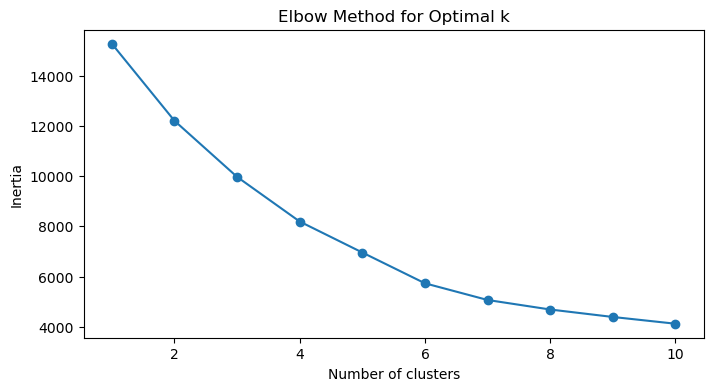

/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


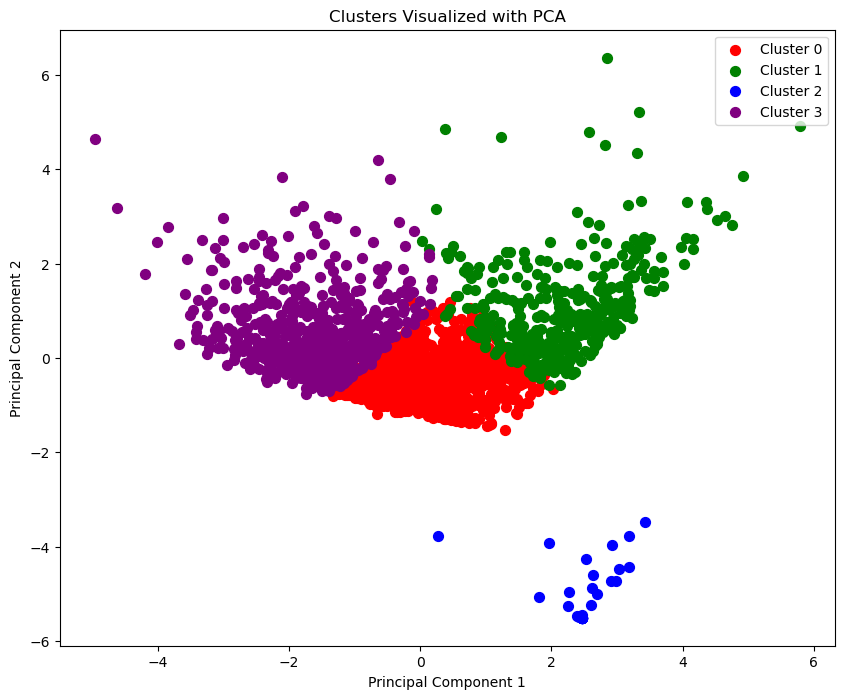

In [40]:
# Normalize the features
scaler = StandardScaler()
features = df[['med_hh_income', 'edu_bachelor_higher', 'poverty_below', 'white_pop', 'black_pop', 'native_american_pop', 'asian_pop']]
features_scaled = scaler.fit_transform(features)

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose a k based on the elbow method plot
k = 4  # Example, adjust based on your elbow plot

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot the clusters based on PCA components
plt.figure(figsize=(10, 8))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualized with PCA')

colors = ['red', 'green', 'blue', 'purple']  # Adjust based on k

for i in range(k):
    plt.scatter(features_pca[df['Cluster'] == i, 0], features_pca[df['Cluster'] == i, 1], s=50, c=colors[i], label=f'Cluster {i}')

plt.legend()
plt.show()

In [29]:
"""
# Summing up the population counts for each racial category within each cluster
racial_pop_sums = df.groupby('Cluster')[['white_pop', 'black_pop', 'native_american_pop', 'asian_pop']].sum()

# Calculating the average median household income for each cluster
average_income = df.groupby('Cluster')['med_hh_income'].mean()

# Displaying the results
print("Sum of populations for racial categories within each cluster:")
print(racial_pop_sums)
print("\nAverage Median Household Income for each cluster:")
print(average_income)
"""

Sum of populations for racial categories within each cluster:
         white_pop  black_pop  native_american_pop  asian_pop
Cluster                                                      
0          2621775     328895                 7292     251544
1           387434     670189                16177      60349
2            16280      12896                  217       3275
3          2503115     201285                 6094     598196

Average Median Household Income for each cluster:
Cluster
0    1.014211e+05
1    5.893764e+04
2   -6.666667e+08
3    1.401377e+05
Name: med_hh_income, dtype: float64


In [37]:
# Group data by 'Cluster' and calculate required statistics
cluster_summary = df.groupby('Cluster').agg({
    'white_pop': 'sum',  # Total white population in each cluster
    'black_pop': 'sum',  # Total black population in each cluster
    'native_american_pop': 'sum',  # Total Native American population in each cluster
    'asian_pop': 'sum',  # Total Asian population in each cluster
    'med_hh_income': 'mean',  # Average median household income in each cluster
    'edu_bachelor_higher': 'sum',  # Total with bachelor's degree or higher in each cluster
    'poverty_below': 'sum',  # Total below poverty level in each cluster
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  white_pop  black_pop  native_american_pop  asian_pop  \
0        0    2621775     328895                 7292     251544   
1        1     387434     670189                16177      60349   
2        2      16280      12896                  217       3275   
3        3    2503115     201285                 6094     598196   

   med_hh_income  edu_bachelor_higher  poverty_below  
0   1.014211e+05               640499          57310  
1   5.893764e+04               150270          69026  
2  -6.666667e+08                 2196            931  
3   1.401377e+05               843343          35178  


In [42]:
"""
This study sought to examine the median household income in respect to factors such as race, poverty, and higher education.
I had expected to see that the higher income clusters there would be more white people and asian people because of the stereotypes
and negative connotations associated with black and American Indian individuals in terms of earnings.

Cluster 0 is the most affluent with the highest average median household income (~$101,421).
The white population is the largest of all the different groups.
The cluster has lower levels of black and Native American residents, compared to the white population.
There is a medium level of the Asian population.
The Asian population is moderate. It has a considerable number of individuals with a bachelor's degree or higher
and a relatively low poverty count.
This might imply that white individuals earn the second most on average.

Cluster 1 has a lower average median household income (~$58,937) compared to Cluster 0.
It is has a larger black population, and smaller white population. Fewer individuals had recieved bachelor degree's
The amount of individuals who lie in poverty are moderate.
This might imply that black individuals earn the third most on average.

Cluster 2 shows an anomalously negative average median household income, which suggests a data entry errors, data processing errors
or calculation errors. It could also suggest an abnormal outlier. It has the smallest population numbers across all ethnic groups. There are very low numbers for both
people who have received their bachelor's degrees. There are also low amounts of individuals in poverty.

Cluster 3 has the highest average median household income (~$140,137). This cluster also has the highest Asian population.
It also has a very high number of individuals with a bachelor's degree or higher. This group has the lowest count of poverty
among the clusters. This may imply that Asian individuals earn more on average than other race.

This study suggests some implications related to race, potentially suggesting that Asian individuals earn the most
followed by white individuals and black individuals. Native Americans do not have enough data to come to an accurate implication.
Highern levels of education seem to be associated with higher levels of income and lower levels of poverty. Further studies may want
to examine the relationship between Hispanics/Latino populations and their respective earnings.
"""

SyntaxError: unterminated string literal (detected at line 4) (1893433955.py, line 4)